In [3]:
import pandas as pd 
df = pd.read_csv("C:/Users/Madan H S/Desktop/Ai/Ai Projct fldr/bmi.csv")

In [4]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
df.Gender = le.fit_transform(df.Gender)
df

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test=train_test_split(df.drop('Index', axis='columns'), df.Index)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()

In [10]:
model.fit(x_train, y_train)

C:\Users\Madan H S\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = model.predict(x_test)

In [12]:
df2 = pd.DataFrame({'orig':y_test, 'pred':y_pred})
df2.to_csv('bmo.csv')

In [13]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test, y_pred)

0.272

In [14]:
from sklearn.metrics import mean_absolute_error as mse
mse(y_test, y_pred)

0.272

In [15]:
model.predict([[0, 155, 39]])

C:\Users\Madan H S\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [16]:
Gender = int(input('enter your gender, 1 for male, 0 for Female'))
Height = int(input('in cms'))
Weight = int(input('in kg'))

res = model.predict([[Gender, Height, Weight]])





    
    

enter your gender, 1 for male, 0 for Female 1
in cms 171
in kg 65


C:\Users\Madan H S\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [17]:
if (res == 1):print('underweight, suggestion : eat more')
elif(res == 2):print('healthy')  
elif(res == 3):print('healthy')    
elif(res == 4):print('obese')
else:print('not available')    

healthy


In [18]:
df


,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [19]:
from sklearn import tree
deci = tree.DecisionTreeClassifier()

In [20]:
deci


DecisionTreeClassifier()

In [21]:
deci.fit(df.drop('Index', axis='columns'), df.Index)

DecisionTreeClassifier()

In [22]:
deci.predict([[1, 167, 85]])

C:\Users\Madan H S\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

In [23]:
import matplotlib.pyplot as plt


In [24]:
text = tree.export_text(deci)

In [25]:
text

'|--- feature_2 <= 122.50\n|   |--- feature_2 <= 83.50\n|   |   |--- feature_1 <= 167.50\n|   |   |   |--- feature_2 <= 65.00\n|   |   |   |   |--- feature_1 <= 152.00\n|   |   |   |   |   |--- feature_2 <= 57.50\n|   |   |   |   |   |   |--- feature_1 <= 144.00\n|   |   |   |   |   |   |   |--- class: 3\n|   |   |   |   |   |   |--- feature_1 >  144.00\n|   |   |   |   |   |   |   |--- class: 2\n|   |   |   |   |   |--- feature_2 >  57.50\n|   |   |   |   |   |   |--- class: 3\n|   |   |   |   |--- feature_1 >  152.00\n|   |   |   |   |   |--- feature_1 <= 162.50\n|   |   |   |   |   |   |--- class: 2\n|   |   |   |   |   |--- feature_1 >  162.50\n|   |   |   |   |   |   |--- feature_1 <= 163.50\n|   |   |   |   |   |   |   |--- feature_2 <= 60.00\n|   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |   |--- feature_2 >  60.00\n|   |   |   |   |   |   |   |   |--- class: 2\n|   |   |   |   |   |   |--- feature_1 >  163.50\n|   |   |   |   |   |   |   |--- class: 2\n

In [30]:
fig = plt.figure(figsize=(150,150))
tree.plot_tree(deci, filled=True) #feature_names=df.drop('Index', axis='columns'))
fig.savefig('tree.png')

In [31]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


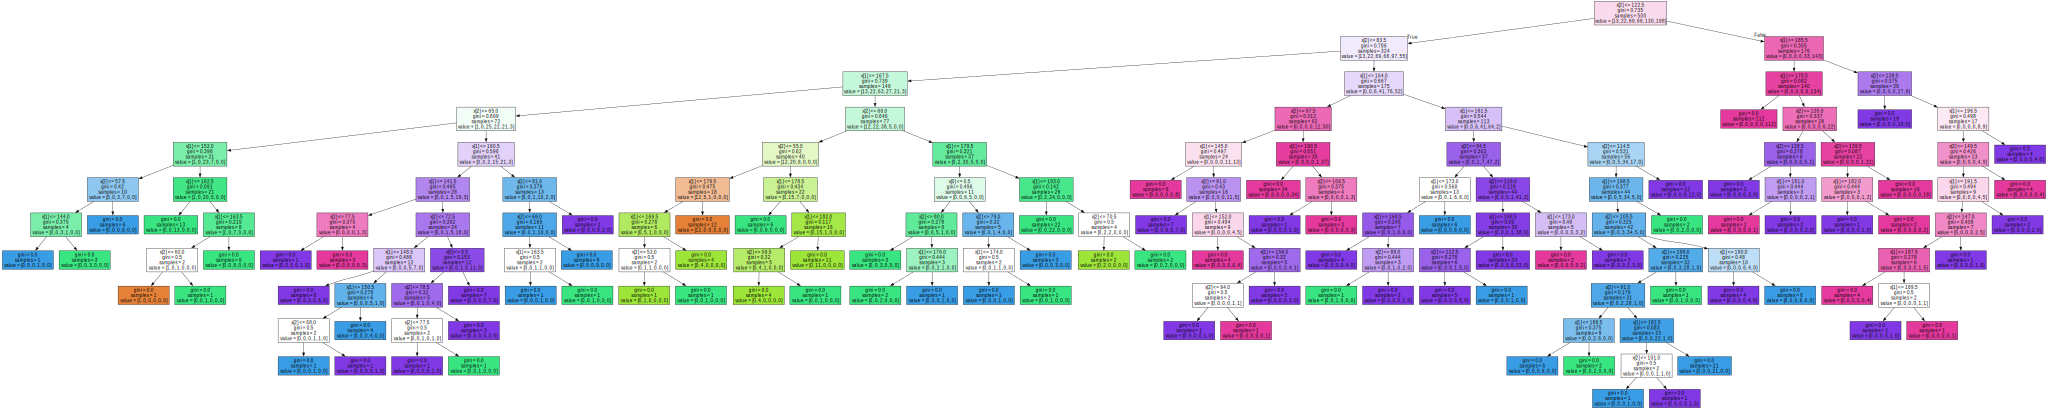

In [32]:
import graphviz
data = tree.export_graphviz(deci, out_file=None, filled=True)
graph = graphviz.Source(data, format='png')
graph

In [33]:
from dtreeviz.trees import dtreeviz

ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (C:\Users\Madan H S\AppData\Roaming\Python\Python311\site-packages\dtreeviz\trees.py)